# Visualizing the Variance of a Laplacian Filter

## Install Dependencies

In [1]:
# Uncomment when running for the first time
# !pip install opencv-python

In [2]:
from PIL import Image
import numpy as np
import cv2
import io
import glob
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from skimage.restoration import estimate_sigma
import statistics

## Load Images

In [3]:
import zipfile

! wget -N https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

with zipfile.ZipFile('GTSRB_Final_Test_Images.zip', 'r') as zip_ref:
    print('Unzipping...')
    zip_ref.extractall()

! wget -N https://raw.githubusercontent.com/aditbiswas1/P2-traffic-sign-classifier/master/signnames.csv

--2021-08-03 22:13:31--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘GTSRB_Final_Test_Images.zip’ not modified on server. Omitting download.

Unzipping...
--2021-08-03 22:13:35--  https://raw.githubusercontent.com/aditbiswas1/P2-traffic-sign-classifier/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-08-03 22:13:35 

In [4]:
gtsrb_images = []
width, height = 64, 64
for index, file in enumerate(glob.glob('GTSRB/Final_Test/Images/*ppm')):
    image = Image.open(file)
    if index < 50:
        resized_image = image.resize((width, height))
        np_array = np.array(resized_image)
        gtsrb_images.append(np_array)
    else:
        break

## Introduce Blur

In [5]:
def motion_blur(images, kernel_size, direction):
    vertical_blurred = []
    horizontal_blurred = []
    for img in images:
        # Specify the kernel size.
        # The greater the size, the more the motion.
        kernel_size = 5

        # Create the vertical kernel.
        kernel_v = np.zeros((kernel_size, kernel_size))

        # Create a copy of the same for creating the horizontal kernel.
        kernel_h = np.copy(kernel_v)

        # Fill the middle row with ones.
        kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
        kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

        # Normalize.
        kernel_v /= kernel_size
        kernel_h /= kernel_size

        # Apply the vertical kernel.
        vertical_mb = cv2.filter2D(img, -1, kernel_v)

        # Apply the horizontal kernel.
        horizontal_mb = cv2.filter2D(img, -1, kernel_h)
        
        vertical_blurred.append(vertical_mb)
        horizontal_blurred.append(horizontal_mb)
        
    vertical_blurred = np.asarray(vertical_blurred).astype("uint8")
    horizontal_blurred = np.asarray(horizontal_blurred).astype("uint8")
    
    if direction == "vertical":
        return vertical_blurred
    elif direction == "horizontal":
        return horizontal_blurred
    else:
        return

In [6]:
blurred_gtsrb_images = motion_blur(gtsrb_images, 1000, "vertical")

## Visualize Laplacian Filter and Calculate Variance

In [7]:
idx = 0
original = gtsrb_images[idx]
blurred = blurred_gtsrb_images[idx]

In [8]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
blurred_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

In [9]:
original_laplacian = cv2.Laplacian(original_gray, cv2.CV_64F)
blurred_laplacian = cv2.Laplacian(blurred_gray, cv2.CV_64F)

In [10]:
def plot_images(a, b, c, title_a, title_b, title_c):
    fig = plt.figure(figsize=(10, 7))
    rows, columns = 1, 3

    fig.add_subplot(rows, columns, 1)
    plt.imshow(a)
    plt.axis('off')
    plt.title(title_a)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(b, cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title_b)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(c, cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title_c)

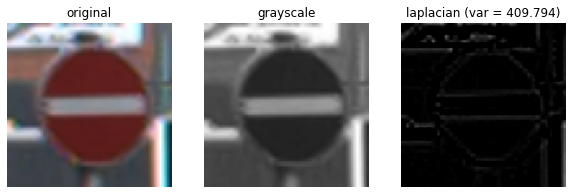

In [11]:
plot_images(original, original_gray, original_laplacian, "original", "grayscale", "laplacian (var = {})".format(round(original_laplacian.var(), 3)))

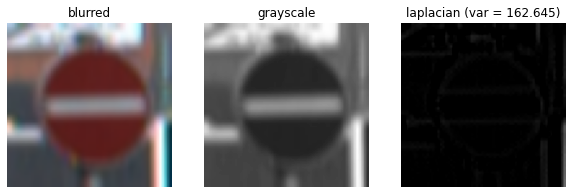

In [12]:
plot_images(blurred, blurred_gray, blurred_laplacian, "blurred", "grayscale", "laplacian (var = {})".format(round(blurred_laplacian.var(), 3)))